In [1]:
import pandas as pd
import numpy as np
from src import pre_process
from src import denseNet2
from PIL import Image
import matplotlib.pyplot as plt

Image.MAX_IMAGE_PIXELS = 3000000000 

train1 = pd.read_csv("../Final-IRONHACK-Project/data/train1.csv")
train_x, valid_x, train_y, valid_y = pre_process.train_valid_split(train1)

train_generator, validation_generator = pre_process.image_generator()



Found 14 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [3]:
# Assuming you have already defined train_generator, validation_generator, and x_train
# and imported the necessary libraries.

# Import YourDenseNetModel class from your module

# Instantiate YourDenseNetModel
dense_net_model = denseNet2.YourDenseNetModel()

# Set generators
dense_net_model.set_generators(train_generator, validation_generator)

# Train the model
history = dense_net_model.train(train_x, epochs=1, batch_size=5)

121/121 [==============================] - 141s 988ms/step - loss: 3.5600 - accuracy: 0.3571 - val_loss: 1.5234 - val_accuracy: 0.4000 - lr: 0.0010


In [4]:
training_loss = history.history['loss']
print(training_loss)
validation_loss = history.history['val_loss']
print(validation_loss)
training_accuracy = history.history['accuracy']
print(training_accuracy)
validation_accuracy = history.history['val_accuracy']
print(validation_accuracy)

[3.56001877784729]
[1.5234094858169556]
[0.3571428656578064]
[0.4000000059604645]


In [5]:
dense_net_model.get_weights('../Final-IRONHACK-Project/data/Dense_weights.h5')

2/2 [==============================] - 39s 25s/step - loss: 0.7149 - accuracy: 0.5000
Evaluation Result: [0.7149374485015869, 0.5]
1/1 [==============================] - 0s 77ms/step


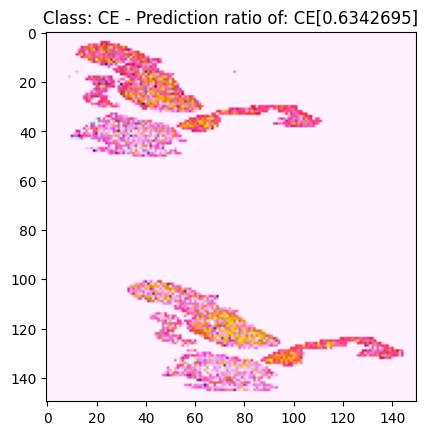

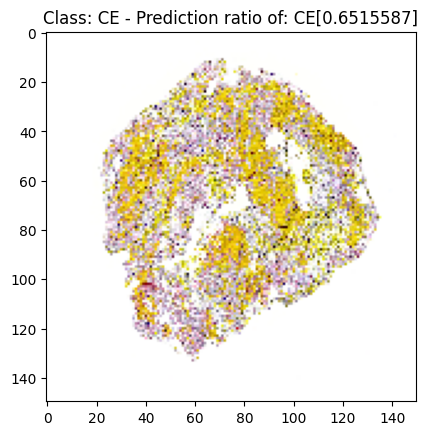

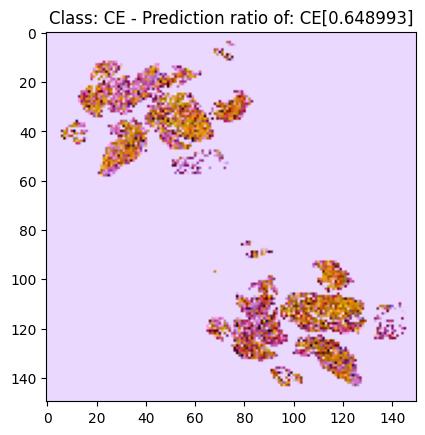

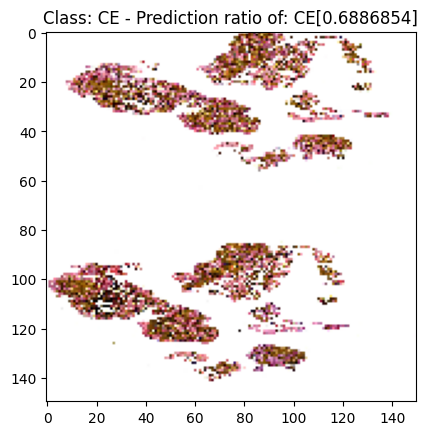

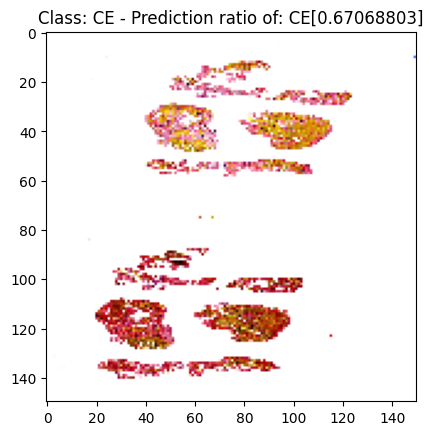

In [ ]:
batch_size = 5
evaluation_result = dense_net_model.evaluation(batch_size)
print("Evaluation Result:", evaluation_result)

class_names = ["CE", "LAA"]
dense_net_model.predict_densenet(class_names)

`Predict on new images:`

In [6]:
import h5py

weights_path = '../Final-IRONHACK-Project/data/Dense_weights.h5'

with h5py.File(weights_path, 'r') as f:
    keys = list(f.keys())
    print("Available keys:", keys)


Available keys: ['conv2d_3', 'conv2d_4', 'conv2d_5', 'dense_2', 'dense_3', 'flatten_1', 'max_pooling2d_3', 'max_pooling2d_4', 'max_pooling2d_5', 'top_level_model_weights']


In [7]:
dense_model_test = denseNet2.YourDenseNetModel()
dense_model_test.load_weights('../Final-IRONHACK-Project/data/Dense_weights.h5')

In [8]:
from tensorflow.keras.preprocessing import image

test_path = ["D:/bootcamp/test/006388_0.tif","D:/bootcamp/test/008e5c_0.tif", "D:/bootcamp/test/00c058_0.tif", "D:/bootcamp/test/01adc5_0.tif"]

preprocessed_images = []
for img_path in test_path:
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target size as needed
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values (adjust if needed)
    preprocessed_images.append(img_array)

X_test = np.vstack(preprocessed_images)

In [9]:
X_test = iter(X_test)

In [10]:
predictions = dense_model_test.predict_on_data(X_test, class_names)
print(predictions)

NameError: name 'class_names' is not defined